# Assignment 1

## Question `2` (Decision Trees)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

This assignment will have you working and experimenting with decision trees. Initially, you will be required to implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, you can experiment with the `scikit-learn` implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## Data_Set Preprocessing

In [ ]:
def dataSplit(data, train_percent):
  trainSize = round(train_percent * len(data))
  trainIndex = random.sample(population = data.index.tolist(), k =  trainSize)
  train_df = data.loc[trainIndex]
  test_df = data.drop(trainIndex)
  return train_df, test_df

In [ ]:
from google.colab import files
uploaded = files.upload()
bankData = pd.read_csv('bankAuth.txt', names = ["variance","skewness","curtosis","entropy","Result"])

Saving bankAuth.txt to bankAuth.txt


In [ ]:
trainBankData, testBankData = dataSplit(bankData, 0.8)
features = ['variance','skewness','curtosis','entropy','Result']

### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy
3. Misclassification Error
4. Log Loss

Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

In [ ]:
def calc_entropy(data):
    col = data['Result']
    counts = np.bincount(col)
    probab = counts / len(col)    
    entropy = 0
    for p in probab:
        if p > 0:
            entropy += p * math.log(p, 2)
    return -entropy

In [ ]:
def calc_overall_entropy(leftNode, rightNode):
  total_data = len(leftNode) + len(rightNode)
  leftNode_weight = len(leftNode)/total_data
  rightNode_weight = len(rightNode)/total_data

  return leftNode_weight*calc_entropy(leftNode) + rightNode_weight*calc_entropy(rightNode)

In [ ]:
def calc_gini(col):
  counts = np.bincount(col)
  probab = counts/len(col)
  # print(probab)
  gini_index = 0
  for p in probab:
    if p > 0:
      gini_index = gini_index + (p*p)
  gini_index = 1 - gini_index
  return gini_index


In [ ]:
def calc_logLoss(actualclass, prediction_probab):
  row_count = np.bincount(actualclass)
  logLoss = 0
  for y,p in actualclass,prediction_probab:
    if(y == 0):
      logLoss = logLoss + math.log(1-p, 2)
    else:
      logLoss = logLoss + math.log(p, 2)

  logLoss = -logLoss / row_count
  return logLoss


In [ ]:
def countZero(Bankdata):
  res = Bankdata["Result"]
  count = 0
  for i in res:
    if(i == 1):
      count = count + 1
  print(count)

In [ ]:
# labels = np.array([50, 50, 70, 70, 70, 90, 150, 150, 150, 150])
# print('entropy:', calc_entropy(labels))

### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

## Helper Functions

In [ ]:
def check_purity(data): 
  uniqueValcount = len(np.unique(data['Result']))
  if(uniqueValcount == 1):
    return True
  return False

In [ ]:
def classify(data):
  classes, countClass = np.unique(data['Result'], return_counts = True)
  maxClassidx = countClass.argmax()
  return classes[maxClassidx]

In [ ]:
def potentialSplits(data, splitting_features):
  rowCount, colCount = data.shape
  potentialSplits = {}
  for featureidx in range(colCount-1):
    potentialSplits[featureidx] = []
    uniqueVals = np.unique(data[splitting_features[featureidx]])
    for i in range(len(uniqueVals)):
      if(i == 0):
        continue
      potentialSplit = (uniqueVals[i]+uniqueVals[i-1])/2
      potentialSplits[featureidx].append(potentialSplit)
    # print(uniqueVal)
  return potentialSplits

In [ ]:
def splitData(data, splitCol, splitVal):
  splitcolVals = data[splitCol]
  lowerRecords = data[splitcolVals <= splitVal]
  upperRecords = data[splitcolVals > splitVal]
  return lowerRecords, upperRecords

In [ ]:
def find_best_split(data, potentialSplits):
  overallRandomess = 10000
  bestSplitcolidx = 0
  bestSplitVal = 0
  for colidx in potentialSplits:
    for value in potentialSplits[colidx]:
      lowerRecords, upperRecords = splitData(data, features[colidx], value)
      randomnessAfterSplit = calc_overall_entropy(lowerRecords, upperRecords)
      if(randomnessAfterSplit <= overallRandomess):
        overallRandomess = randomnessAfterSplit
        bestSplitcolidx = colidx
        bestSplitVal = value
  return bestSplitcolidx, bestSplitVal

### Doubt:
Do we have to handle the case where if our data points are less than certain number then we have to give result 
If Yes then what should be the output incase of Tie

# Build Tree Algorithm


In [ ]:
def buildTree(data, count = 0):

  # Base Case
  if(check_purity(data)):
    return classify(data)
  if(count >= 3):
    return classify(data)

  count += 1
  # Recursive Call

  potential_splits = potentialSplits(data, features)
  bestSplitcolidx, bestSplitVal = find_best_split(data, potential_splits)
  bestSplitcol = features[bestSplitcolidx]
  lowerRecords, upperRecords = splitData(data, bestSplitcol, bestSplitVal)

  question = "{} <= {}".format(bestSplitcol, bestSplitVal)
  subTree = {question:[]}

  yes_ans = buildTree(lowerRecords, count)
  no_ans = buildTree(upperRecords, count)
  subTree[question].append(yes_ans)
  subTree[question].append(no_ans)

  return subTree

In [ ]:
tree = buildTree(trainBankData, 0)
tree

{'variance <= 0.311555': [{'skewness <= 7.02': [{'curtosis <= 1.0669': [1, 1]},
    {'variance <= -4.3819': [1, 0]}]},
  {'variance <= 1.7907000000000002': [{'curtosis <= -2.2721999999999998': [1,
      0]},
    {'curtosis <= -4.802': [1, 0]}]}]}

# Classification

In [ ]:
def classification(query, tree):
  question = list(tree.keys())[0]
  feature, op, val = question.split()
  
  if(query[feature] <= float(val)):
    ans = tree[question][0]
  else:
    ans = tree[question][1]
  
  if(isinstance(ans, dict)):
    return classification(query, ans)
  return ans

# Accuracy


In [ ]:
def accuracy_calc():
  correctCount = 0
  for idx in range(len(testBankData)):
    predictedValue = classification(testBankData.iloc[idx], tree)
    actualValue = testBankData.iloc[idx]['Result']
    if(actualValue == predictedValue):
      correctCount += 1
  return correctCount / len(testBankData)


In [ ]:
accuracy_calc()

0.9452554744525548

## `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

DecisionTreeClassifier vs DecisionTReeRegressor

- DecisionTreeClassifier is used for classification problems, like classifying images of animals etc where we have finite number of classes and our data point can belong to any one of the pre-defined class and according to the question we have to classify the bank note as fake or authentic based on various parameters.
- DecisionTReeRegressor on the other hand is more about prediciting values from infinite possibilities corresponding to a  regression problem like how many of people will die from road accidents. Regressor is helpful when want to identify or quantify a value i.e. how good or bad a corresponding data set is on w whole example if we would have to identify what could be the bank notes count when certain firm with certain characterstics is printing them.


In [ ]:
# your code here

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [ ]:
data = pd.read_csv('bankAuth.txt')

## Describe

In [ ]:
bankData.describe()

,variance,skewness,curtosis,entropy,Result
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Info

In [ ]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Result    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [ ]:
from sklearn import model_selection
X = bankData[['variance','skewness','curtosis','entropy']]
Y = bankData['Result']
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y)
# x_train.head()

## Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.9358600583090378

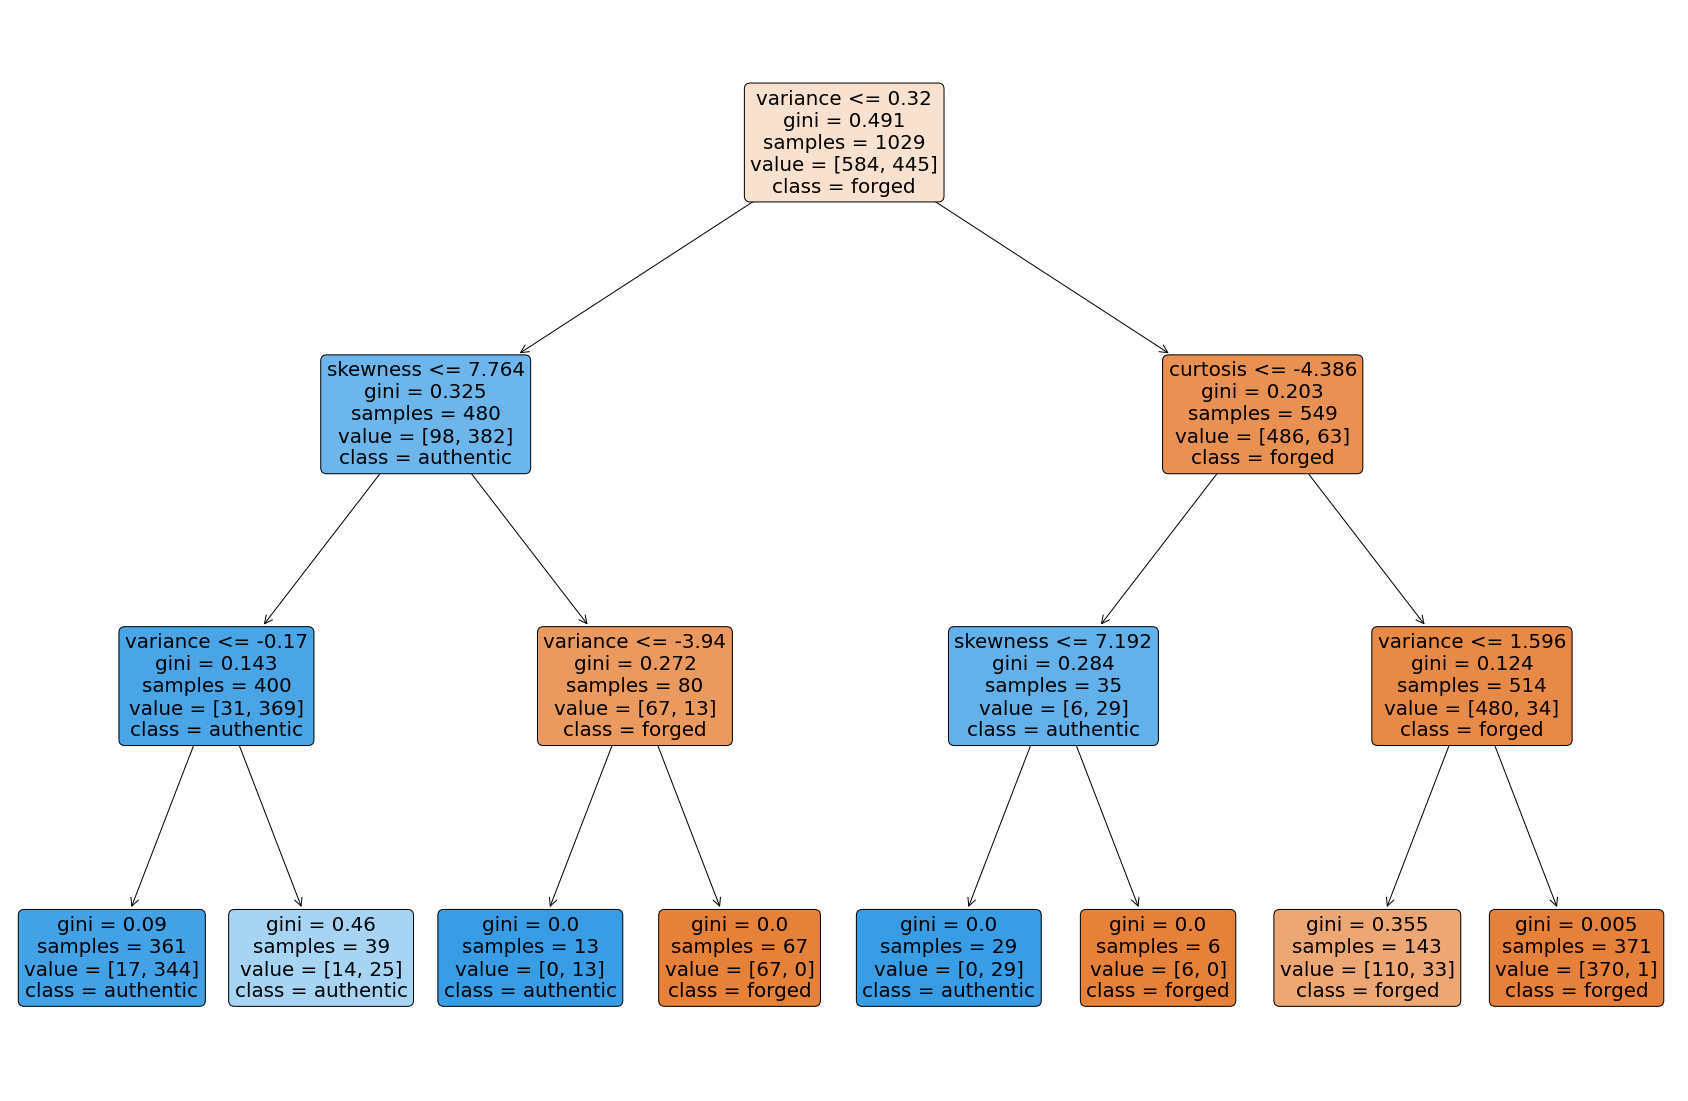

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, rounded=True,class_names=['forged', 'authentic'],feature_names=['variance', 'skewness', 'curtosis', 'entropy'])
plt.show()

### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

| Criterion | MaxDepth | Min. Samples Split | Accuracy |
| --- | --- | --- | --- |
| Entropy | 3 | 2 < x < 20 | 92.34% |
| Gini | 3 | 2 < x < 35 | 93.5% |
| Entropy | 5 | 2 < x < 20 | 98.18% |
| Gini | 5 | 2 < x < 20 | 97.09% |
| Entropy | 3 | 23 | 91.27% |
| Gini | 3 | 36| 92.7% |